## Homework 3: Problem set 

Mara Baylis

Lab November 20


Submitted: November 29, 2023

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Simulation of Markov Process.

a)

\begin{equation}
P = \begin{bmatrix}
0.2 & 0.7 & 0.1 \\
0.2 & 0.5 & 0.3 \\
0.2 & 0.4 & 0.4
\end{bmatrix}
\end{equation}


b)

In [12]:
P = np.array([[0.2, 0.7, 0.1],
              [0.2, 0.5, 0.3],
              [0.2, 0.4, 0.4]])

X_0 = 1
num_steps = 10  

current_state = X_0
chain_realization = [current_state]

for _ in range(num_steps):
    current_state = np.random.choice([0, 1, 2], p=P[current_state])
    chain_realization.append(current_state)

print("Chain Realization:", chain_realization)

Chain Realization: [1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1]


## 2. Stationary Distribution.

a)

In [24]:
P = np.array([[0.2, 0.7, 0.1],
              [0.2, 0.5, 0.3],
              [0.2, 0.4, 0.4]])

P_T = P.T

I = np.identity(3)

eigenvalues, eigenvectors = np.linalg.eig(P_T)

print("Eigenvalues:", eigenvalues)

index = np.where(np.isclose(eigenvalues, 1))[0]

if index.size == 0:
    print("No eigenvalue close to 1.")
else:
    index = index[0]
    stationary_distribution = eigenvectors[:, index]
    stationary_distribution /= stationary_distribution.sum()
    print("Stationary Distribution:", stationary_distribution)


Eigenvalues: [ 1.0000000e+00 -5.0415401e-17  1.0000000e-01]
Stationary Distribution: [0.2        0.51111111 0.28888889]


b)

Eigenvalues: [ 1.0000000e+00 -5.0415401e-17  1.0000000e-01]
Stationary Distribution: [0.2        0.51111111 0.28888889]


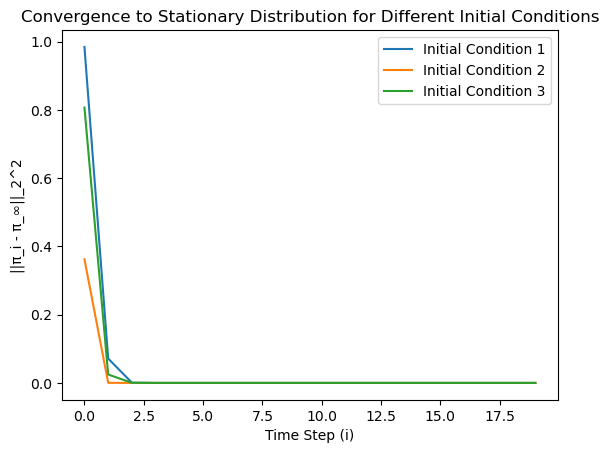

In [19]:
P = np.array([[0.2, 0.7, 0.1],
              [0.2, 0.5, 0.3],
              [0.2, 0.4, 0.4]])

P_T = P.T

I = np.identity(3)

eigenvalues, eigenvectors = np.linalg.eig(P_T)

print("Eigenvalues:", eigenvalues)

index = np.where(np.isclose(eigenvalues, 1))[0]

if index.size == 0:
    print("No eigenvalue close to 1.")
else:
    index = index[0]
    stationary_distribution = eigenvectors[:, index]
    stationary_distribution /= stationary_distribution.sum()
    print("Stationary Distribution:", stationary_distribution)

num_steps = 20

norm_values_list = []

initial_conditions = [np.array([1, 0, 0]), np.array([0, 1, 0]), np.array([0, 0, 1])]

for pi_0 in initial_conditions:
    norm_values = np.zeros(num_steps)
    for i in range(num_steps):
        pi_i = pi_0 @ np.linalg.matrix_power(P, i)
        norm_values[i] = np.linalg.norm(pi_i - stationary_distribution)**2
    
    norm_values_list.append(norm_values)

for i, norm_values in enumerate(norm_values_list):
    plt.plot(range(num_steps), norm_values, label=f'Initial Condition {i+1}')

plt.xlabel('Time Step (i)')
plt.ylabel('||π_i - π_∞||_2^2')
plt.title('Convergence to Stationary Distribution for Different Initial Conditions')
plt.legend()
plt.show()


# 3. Absorbing state.

a) 

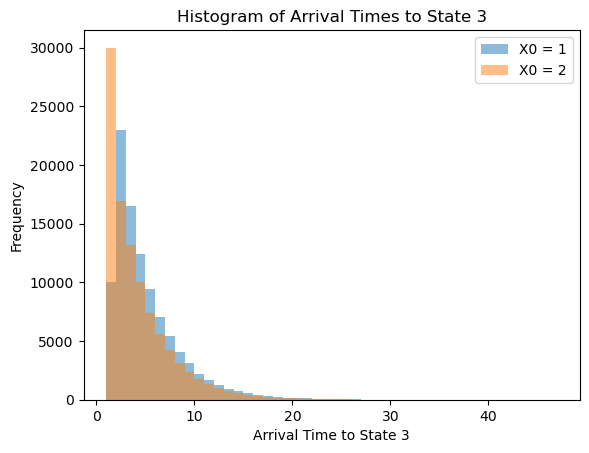

Mean Arrival Time (X0 = 1): 4.62243
Mean Arrival Time (X0 = 2): 3.83974


In [25]:
P = np.array([[0.2, 0.7, 0.1],
              [0.2, 0.5, 0.3],
              [0.2, 0.4, 0.4]])

def simulate_until_state_3(initial_state):
    current_state = initial_state
    time = 0
    while current_state != 2:  
        current_state = np.random.choice([0, 1, 2], p=P[current_state])
        time += 1
    return time

num_simulations = 100000

arrival_times_1 = [simulate_until_state_3(0) for _ in range(num_simulations)]

arrival_times_2 = [simulate_until_state_3(1) for _ in range(num_simulations)]

plt.hist(arrival_times_1, bins=range(1, max(max(arrival_times_1), max(arrival_times_2))+2), alpha=0.5, label='X0 = 1')
plt.hist(arrival_times_2, bins=range(1, max(max(arrival_times_1), max(arrival_times_2))+2), alpha=0.5, label='X0 = 2')
plt.xlabel('Arrival Time to State 3')
plt.ylabel('Frequency')
plt.title('Histogram of Arrival Times to State 3')
plt.legend()
plt.show()

mean_arrival_time_1 = np.mean(arrival_times_1)
mean_arrival_time_2 = np.mean(arrival_times_2)

print(f"Mean Arrival Time (X0 = 1): {mean_arrival_time_1}")
print(f"Mean Arrival Time (X0 = 2): {mean_arrival_time_2}")


### Part b)

To compute the theoretical mean arrival time to the absorbing state (state 3) theoretically, I use the system of linear equations given by the formula:

$\begin{equation}
    \mu_i = 1 + \sum_{j=1}^{3}p_{ij}\mu_j
\end{equation}$
where the expected arrival time to state 3 is $\mathbb{E}[T_i] = \mu_i$ where the initial state is $i$.


$\mu_1 = 1 + \left(\ 0.2\mu_1 + 0.2\mu_2 + 0.2\mu_3 \right)$

and

$\mu_2 = 1 + \left(\ 0.7\mu_1 + 0.5\mu_2 + 0.4\mu_3 \right)$

and

$\mu_3 = \mathbb{E}[T_3] = 0$

$\mu_3 = 0$ (as stated in the problem).


so
$\begin{equation}
    \begin{cases}
        \mu_1 = 1 + \frac{1}{5}\mu_1 + \frac{1}{5}\mu_2 \\
        \mu_2 = 1 + \frac{7}{10}\mu_1 + \frac{1}{2}\mu_2
    \end{cases}
    \implies
    \begin{cases}
        -10 = -8\mu_1 +  7\mu_2 \\
        -10 =  2\mu_1 + -5\mu_2
    \end{cases}
\end{equation}$
meaning that
$\begin{equation}
    \begin{cases}
        \mathbb{E}[T_1] = \mu_1 = \frac{60}{13} \\
        \mathbb{E}[T_2] = \mu_2 = \frac{50}{13}
    \end{cases}
\end{equation}$
which is relatively close to the numerically calculated waiting times.

b)

In [23]:
P = np.array([[0.2, 0.7, 0.1],
              [0.2, 0.5, 0.3],
              [0.2, 0.4, 0.4]])

# μ1 = 1 + p11μ1 + p12μ2 + p13μ3
# μ2 = 1 + p21μ1 + p22μ2 + p23μ3
# μ3 = 0 (as T3 = 0)

equations = [
    [1 - P[0, 0], -P[0, 1], -P[0, 2]],
    [-P[1, 0], 1 - P[1, 1], -P[1, 2]],
    [0, 0, 1]  
]

mean_arrival_times = np.linalg.solve(equations, [1, 1, 0])

print(f"Mean Arrival Time (X0 = 1): {mean_arrival_times[0]}")
print(f"Mean Arrival Time (X0 = 2): {mean_arrival_times[1]}")


Mean Arrival Time (X0 = 1): 4.615384615384615
Mean Arrival Time (X0 = 2): 3.846153846153846


Simulation Results (Part a):

Mean Arrival Time (X0 = 1): 4.62243
Mean Arrival Time (X0 = 2): 3.83974


Theoretical Results (Part b):

Mean Arrival Time (X0 = 1): 4.615384615384615,
Mean Arrival Time (X0 = 2): 3.846153846153846



The mean arrival times are close between simulation and theory for both initial states.
Small discrepancies may arise due to the stochastic nature of the Markov process in simulations.